- estimator(모델), fit(학습), predict(예측), transform(변환)
- sklearn의 데이터셋은 통상적으로 2차원 구조로 되어 있다. 또한 기본적으로 딕셔너리 구조로 되어있다.
- target은 보통 1차원으로 구성되어 있다.
- GridSearchCV: 하이퍼 파라미터의 튜닝을 지원하는 함수이다.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
data = load_breast_cancer() # 연습용 데이터 셋 로드
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.data[1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [9]:
data.target[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [11]:
data.feature_names 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)
 #test_size를 생략하면 대략 0.25 임 (test_size는 생략이 가능하다.)// random_state를 생략하면 항상 데이터가 달라진다.

In [16]:
X_train.shape

(426, 30)

In [17]:
X_test.shape

(143, 30)

In [18]:
model = DecisionTreeClassifier(criterion='entropy') #의사결정트리(지도학습 모델 중 하나이다.)  
# 정확도를 높일 수 있는 파라메타를 찾아야 한다.
#인스턴스: 객체화 시키는 것이 인스턴스이다.
model # 이게 Estimator 이다.
# 지도학습 모델이면 학습데이터와 레이블 두 개의 파라메타가 주어짐, 비지도학습은 레이블이 없음(학습데이터만 주어짐)

DecisionTreeClassifier(criterion='entropy')

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
y_pred = model.predict(X_test) 
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [27]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)  #accuracy_score는 분류형 모델에서만 사용한다. (y_test 와 y_pred의 정확도를 비교함)
# accuracy_score는 정답과 예측한 결과를 파라메타로 줌

0.951048951048951

In [34]:
model.score(X_train, y_train) # model은 score 란 메소드를 내장하고 있고, 이를 사용하면 정확도가 구해짐


0.9225352112676056

In [28]:
from sklearn.preprocessing import StandardScaler
# 전처리하기 전 출력
print(X_train)

[[1.289e+01 1.312e+01 8.189e+01 ... 5.366e-02 2.309e-01 6.915e-02]
 [1.340e+01 2.052e+01 8.864e+01 ... 2.051e-01 3.585e-01 1.109e-01]
 [1.296e+01 1.829e+01 8.418e+01 ... 6.608e-02 3.207e-01 7.247e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]


In [30]:
# 전처리 - 스케일링 적용
scaler = StandardScaler() # StandardScaler => 평균은 0이 되고 표준편차가 1이 되도록 값을 조정하는 것
scaler.fit(X_train)
X_train = scaler.transform(X_train)


In [31]:
# 전처리후 결과 확인
X_train

array([[-0.34913849, -1.43851335, -0.41172595, ..., -0.91671059,
        -0.92508585, -0.80841115],
       [-0.20468665,  0.31264011, -0.13367256, ...,  1.43655962,
         1.14955889,  1.56911143],
       [-0.32931176, -0.21507235, -0.31739376, ..., -0.7237126 ,
         0.53496977, -0.61934827],
       ...,
       [ 0.04739597, -0.56293662, -0.06529202, ..., -1.23262438,
        -0.68282718, -1.261137  ],
       [-0.04040808,  0.09966199, -0.03151368, ...,  1.08847951,
         0.48944465,  1.26159953],
       [-0.5502381 ,  0.31264011, -0.6040977 , ..., -0.59582424,
        -0.29911546, -0.82948141]])

fit_transform

In [35]:
# 전처리하기 전 출력
print(X_test)


[[1.247e+01 1.860e+01 8.109e+01 ... 1.015e-01 3.014e-01 8.750e-02]
 [1.894e+01 2.131e+01 1.236e+02 ... 1.789e-01 2.551e-01 6.589e-02]
 [1.546e+01 1.948e+01 1.017e+02 ... 1.514e-01 2.837e-01 8.019e-02]
 ...
 [1.104e+01 1.683e+01 7.092e+01 ... 7.431e-02 2.998e-01 7.881e-02]
 [1.981e+01 2.215e+01 1.300e+02 ... 2.388e-01 2.768e-01 7.615e-02]
 [1.026e+01 1.222e+01 6.575e+01 ... 6.696e-02 2.937e-01 7.722e-02]]


In [36]:
# 전처리 - 스케일링 적용
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)


In [37]:
# 전처리후 결과 확인
X_test

array([[-0.47853809, -0.21371678, -0.45835473, ..., -0.27372978,
         0.07289581,  0.09152022],
       [ 1.37424404,  0.38950001,  1.29239853, ...,  0.84579664,
        -0.67110896, -1.02766663],
       [ 0.37769352, -0.01783827,  0.3904579 , ...,  0.44803208,
        -0.21152934, -0.28706636],
       ...,
       [-0.88804017, -0.60769971, -0.87720113, ..., -0.66701045,
         0.04718507, -0.35853687],
       [ 1.62338166,  0.57647495,  1.55597935, ...,  1.71220016,
        -0.32240694, -0.49629888],
       [-1.11140494, -1.63383602, -1.09012501, ..., -0.77332207,
        -0.05083716, -0.44088334]])

### iris dataset으로 기계학습 맛보기

In [38]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [40]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [42]:
iris = pd.DataFrame(data=data.data, columns=data.feature_names) # numpy의 ndarray를 pandas의 DataFrame으로 변환
iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
target = pd.Series(data.target, dtype="category") # 타겟데이터도 판다스로 변환 dtype="category"=> 카테고리 형태로 변환
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

In [44]:
target =target.cat.rename_categories(data.target_names) #타겟값을 숫자에서 문자열로 수정
target


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [45]:
iris["species"] = target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [47]:
iris.rename({"sepal length (cm)":"sepal_length", "sepal width (cm)": "sepal_width", "petal length (cm)":"petal_length", "petal width (cm)":"petal_width"}, axis=1, inplace=True)
iris
 # 열 이름을 수정하는 과정이다.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [48]:
iris.isna().sum(axis=0) # 결측값 확인 작업이다.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [49]:
iris.info() # DataFrame에 대한 정보를 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [50]:
iris.describe()
# 기초통계량 확인 (수치데이터만 보여줌)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
iris.corr()
# 피처끼리의 상관관계를 분석한다. 회귀 모델에서는 이 작업이 필요하지만, 분류모델에서는 필요하지 않다.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [52]:
iris.groupby("species").size()
# 타겟별 기술 통계 분석

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [61]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


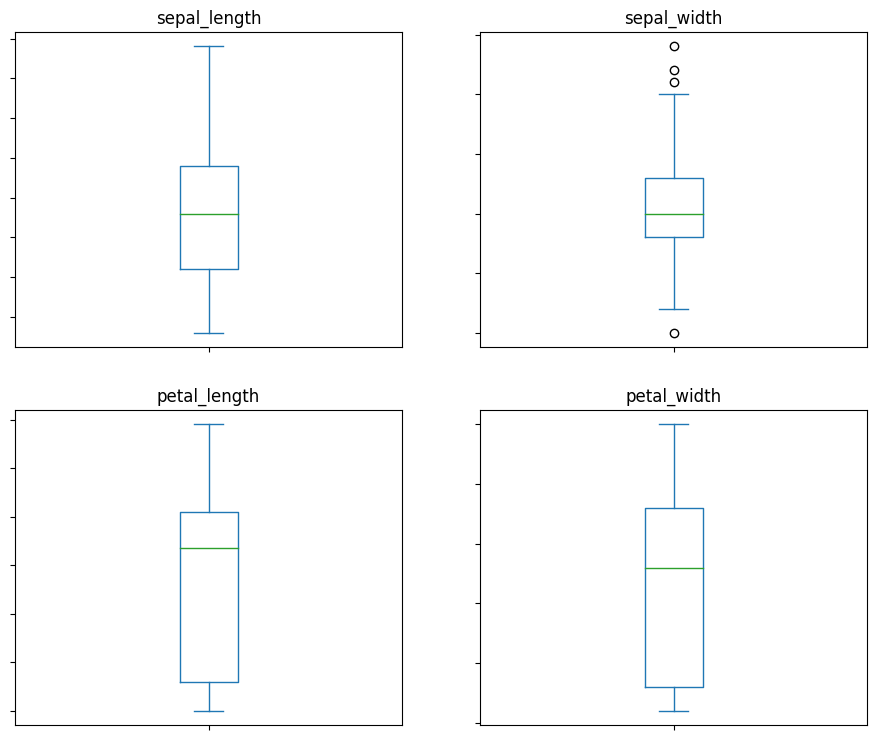

In [54]:
#boxplot를 그려 기초 통계량을 시각화하고 이상치를 탐지한다.
def boxplot_iris(feature_names, dataset):
 i = 1
 plt.figure(figsize=(11, 9))
 for col in feature_names:
     plt.subplot(2,2,i)
     plt.axis('on') # 축을 보여달라는 의미
     plt.tick_params(axis="both", left=True, top=False, right=False, #axis="both" => x축과 y축 모두에 표시하겠다.
         bottom=True, labelleft=False, labeltop=False, 
         labelright=False, labelbottom=False)
     dataset[col].plot(kind="box", subplots=True, sharex=False, sharey=False)
     plt.title(col)
     i += 1
 plt.show()
boxplot_iris(iris.columns[:-1], iris) # iris.columns[:-1] => species를 제외한 나머지가 되는 것임

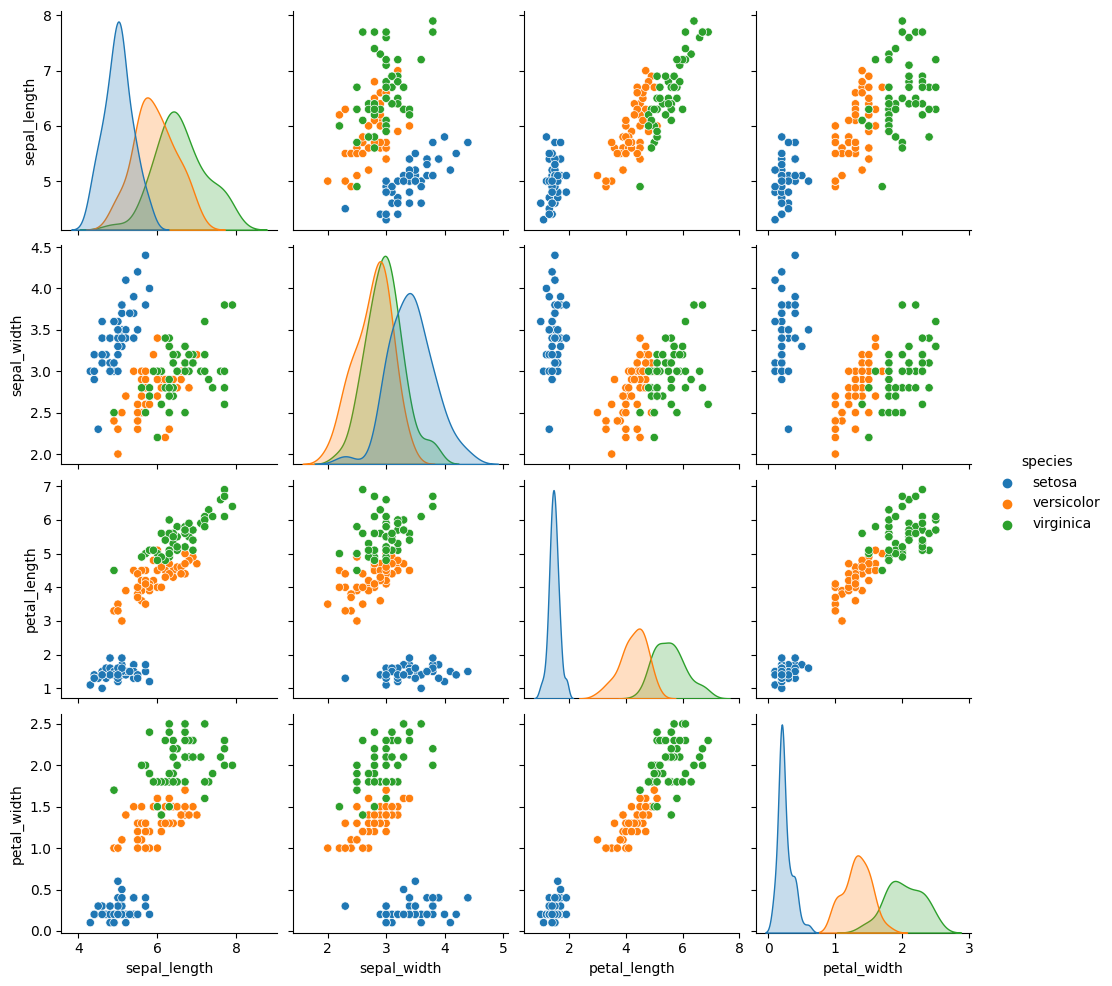

In [55]:
import seaborn as sns
sns.pairplot(iris, hue="species") #hue => 카테고리의 색상을 다르게 표시함
plt.show()
# pairplot를 활용하여 피처 간의 상관관계 및 데이터 분포를 시각화한다.

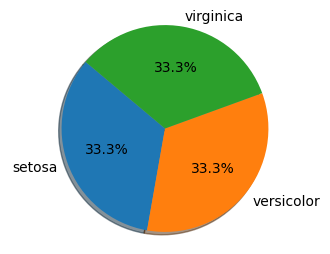

In [56]:
def piechart_iris(colName, dataset):
 plt.figure(figsize=(4, 3))
 labels = []
 sizes = []
 df = dataset.groupby(colName).size()
 for key in df.keys():
     labels.append(key)
     sizes.append(df[key])
 plt.pie(sizes, labels=labels, autopct="%1.1f%%",
     shadow=True, startangle=140)
 plt.axis('equal')
 plt.show()
piechart_iris("species", iris) 
# piechart를 그려 타겟의 클래스 비율을 시각화한다.  타겟 클래스 별로 데이터가 균등하게 구성되어있음을 알 수 있다.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], 
test_size=0.33, random_state=42) #iris.iloc[:, :-1] => species를 제외함
print(X_train)
print(X_test)
print(y_train)
print(y_test)
# sklearn의 train_test_split 함수로 훈련용 데이터셋과 성능평가용 데이터셋을 나눈다.

     sepal_length  sepal_width  petal_length  petal_width
96            5.7          2.9           4.2          1.3
105           7.6          3.0           6.6          2.1
66            5.6          3.0           4.5          1.5
0             5.1          3.5           1.4          0.2
122           7.7          2.8           6.7          2.0
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[100 rows x 4 columns]
     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5    

In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=None,
     min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
     max_features=None, random_state=42, max_leaf_nodes=None,
     min_impurity_decrease=0.0, class_weight=None)

# 데이터 분석 결과를 토대로 적합한 알고리즘을 선택한다.
# 이 모델(DecisionTreeClassifier)은 분류모델이다.

In [67]:
model.fit(X_train, y_train) 


DecisionTreeClassifier(random_state=42)

In [68]:
model.score(X_test, y_test)


0.98

모델 일반화 전략
1. k겹 교차검증

In [70]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model, X_train, y_train, cv=cv) # cv => k폴더의 객체이다.
fin_result = np.mean(results)
for i, _ in enumerate(results):
     print("{}번째 교차검증 정확도: {}".format(i, _))
print("교차검증 최종 정확도: {}".format(fin_result))

0번째 교차검증 정확도: 0.9
1번째 교차검증 정확도: 1.0
2번째 교차검증 정확도: 0.8
3번째 교차검증 정확도: 1.0
4번째 교차검증 정확도: 0.8
5번째 교차검증 정확도: 0.9
6번째 교차검증 정확도: 1.0
7번째 교차검증 정확도: 0.9
8번째 교차검증 정확도: 1.0
9번째 교차검증 정확도: 1.0
교차검증 최종 정확도: 0.93


2. learning curve

In [71]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


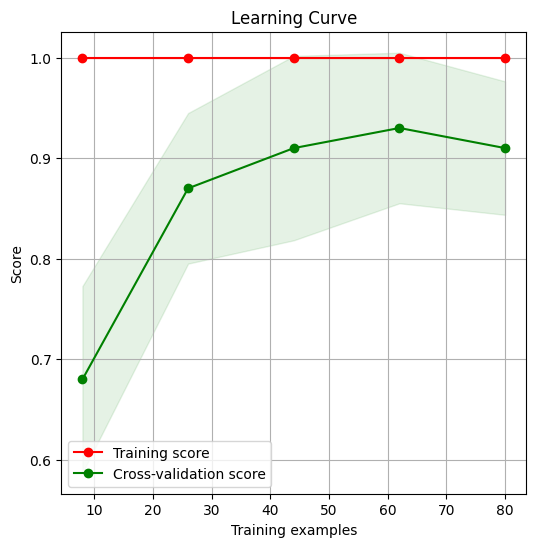

In [72]:
import scikitplot as skplt

model = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=None,
     min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
     max_features=None, random_state=42, max_leaf_nodes=None,
     min_impurity_decrease=0.0, class_weight=None)

skplt.estimators.plot_learning_curve(model, X_train, y_train, figsize=(6,6))
plt.show()

### 3. GridSearchCV(중요)// 최적의 파라메터를 찾기 쉽다.
- estimator: 측정하고자 하는 모델로 classifier, regressor,pipeline이 사용될 수 있다.
- param_grid: 찾고자하는 파라미터. dict형식
- n_job: 병렬 처리갯수, -1은 전부
- cv: 교차 검증을 위해 분할되는 폴드 수
- scoring: 예측 성능을 측정할 평가방법, 보통 사이킷런에서 제공하는 문자열(예:accuracy)을 넣지만 별도의 함수도 직접 지정이 가능
- refit: True면 가장 최적의 하이퍼 파라미터를 찾을 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다. default = True
- verbose: log 출력의 level을 조정(숫자가 클 수록 많은 log 출력)

In [73]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
parameters = {'max_depth' : [4,5,6,10],     # value에는 테스트 하고자 하는 파라메터의 값을 주면 됨
     'criterion' : ['gini', 'entropy'],
     'splitter' : ['best', 'random'],
     'min_weight_fraction_leaf' : [0.0, 0.1, 0.2, 0.3],
     'random_state' : [7, 23, 42, 78],
     'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2]}
model = GridSearchCV(estimator = estimator,
     param_grid = parameters,
     cv = cv, verbose = -1,
     n_jobs = -1, refit = True)
model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 10],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78],
                         'splitter': ['best', 'random']},
             verbose=-1)

In [74]:
print("Best Estimator:\n", model.best_estimator_);print()
print("Best Params:\n", model.best_params_);print()
print("Best Score:\n", model.best_score_);print()

Best Estimator:
 DecisionTreeClassifier(max_depth=4, random_state=23, splitter='random')

Best Params:
 {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 23, 'splitter': 'random'}

Best Score:
 0.97



### 혼동행렬
- precision: 정밀도
- recall : 재현율
- fall-out: 위양성률
- f_score: 정밀도와 재현율의 가중조화평균

In [78]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test) # 예측한 값
confMatrix = confusion_matrix(y_test, pred)
print("Confusion Matrix : \n : ", confMatrix)
# 혼동행렬을 통해 정확도도 구할 수 있다

Confusion Matrix : 
 :  [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


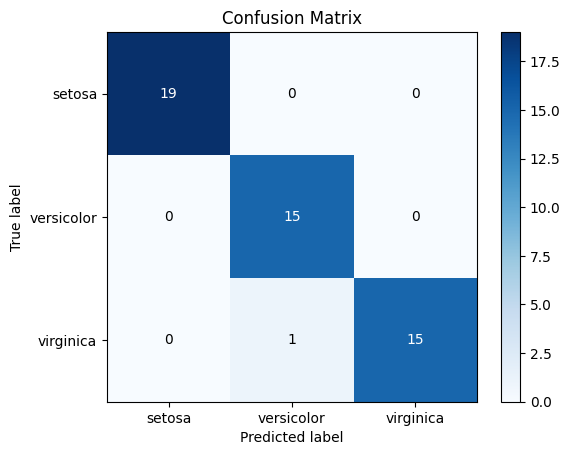

In [79]:
import scikitplot as skplt
pred = model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

In [81]:
Number = [1,2,3]
Name = ['mbc', 'sbs',' kbs']
for a,b in zip(Number, Name): #ZIp함수
    print(a,b)

1 mbc
2 sbs
3  kbs


In [80]:
from sklearn.metrics import precision_score
# average 기본값은 binary이며 다중 분류일때는 binary가 아니어야 함
precisions = precision_score(y_test, model.predict(X_test), average=None) # average = None => 다중분류
for target, score in zip(data.target_names, precisions):
 print(f"{target}의 정밀도: {score}")

setosa의 정밀도: 1.0
versicolor의 정밀도: 0.9375
virginica의 정밀도: 1.0


In [82]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test), target_names = ['setosa','versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

